In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

In [14]:
data = pd.read_csv('AmesHousing.csv')


# Виділення цільової змінної та вхідних змінних
X = data.drop('SalePrice', axis=1)
y = data['SalePrice']

# Розбиття на тренувальний та тестовий набір
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:

# Обробка відсутніх значень
numerical_imputer = SimpleImputer(strategy='median')
categorical_imputer = SimpleImputer(strategy='most_frequent')

numerical_features = X_train.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X_train.select_dtypes(exclude=[np.number]).columns.tolist()

X_train[numerical_features] = numerical_imputer.fit_transform(X_train[numerical_features])
X_test[numerical_features] = numerical_imputer.transform(X_test[numerical_features])

X_train[categorical_features] = categorical_imputer.fit_transform(X_train[categorical_features])
X_test[categorical_features] = categorical_imputer.transform(X_test[categorical_features])

In [16]:

# One-Hot Encoding
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
X_train_encoded = pd.DataFrame(encoder.fit_transform(X_train[categorical_features]), index=X_train.index)
X_test_encoded = pd.DataFrame(encoder.transform(X_test[categorical_features]), index=X_test.index)

X_train = pd.concat([X_train[numerical_features], X_train_encoded], axis=1)
X_test = pd.concat([X_test[numerical_features], X_test_encoded], axis=1)
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

f:\Anaconda\envs\ml2023\Lib\site-packages\sklearn\preprocessing\_encoders.py:228: UserWarning: Found unknown categories in columns [16, 30, 40] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [17]:
# Масштабування
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [18]:
# 4. Побудова моделі регресії
model = LinearRegression()
model.fit(X_train, y_train)
# Прогнозування
y_pred = model.predict(X_test)

Root Mean Squared Error: 36143.90629371786


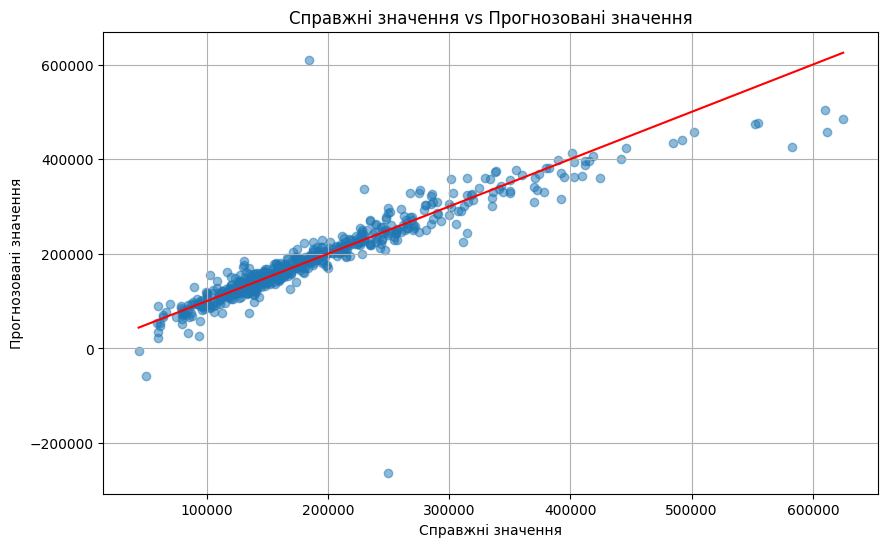

In [19]:

# Оцінка точності моделі
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")
# Візуалізація
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red') # діагональ
plt.title('Справжні значення vs Прогнозовані значення')
plt.xlabel('Справжні значення')
plt.ylabel('Прогнозовані значення')
plt.grid(True)
plt.show()
